# 계층적 클러스터링

계층적 클러스터링은 하나의 데이터 샘플을 하나의 클러스터로 보고 가장 유사도가 높은 클러스터를 합치면서 클러스터 갯수를 줄여 가는 방법을 말한다.

## 클러스터간의 유사도 측정

클러스터간의 유사도 혹은 거리를 측정하는 방법에는 다음과 같은 것이 있다.

### 비귀납적 방법

#### centroid
두 클러스터의 중심점(centroid)를 정의한 다음 두 중심점의 거리로 측정.

$$
   d(u,v) = \|c_u - c_v\|_2
$$

여기에서  $c_u$ 와 $c_v$ 는 각각 두 클러스터 $u$ 와 $v$ 의 중심점이다. 

#### single
클러스터 $u$의 모든 데이터 $i$와 클러스터 $v$의 모든 데이터 $j$의 모든 조합에 대해 거리를 측정해서 최소값을 구한다. 최소 거리(Nearest Point) 방법이라고도 한다.

$$
   d(u,v) = \min(dist(u[i],v[j]))
$$

#### complete
클러스터 $u$의 모든 데이터 $i$와 클러스터 $v$의 모든 데이터 $j$의 모든 조합에 대해 거리를 측정한 후 가장 큰 값을 구한다. Farthest Point Algorithm 또는  Voor Hees Algorithm 이라고도 한다.

$$
   d(u, v) = \max(dist(u[i],v[j]))
$$

#### average
클러스터 $u$의 모든 데이터 $i$와 클러스터 $v$의 모든 데이터 $j$의 모든 조합에 대해 거리를 측정한 후 평균을 구한다. $|u|$와 $|v|$는 각각 두 클러스터의 원소의 갯수를 뜻한다.

$$
   d(u,v) = \sum_{ij} \frac{d(u[i], v[j])}{(|u||v|)}
$$


### 귀납적 방법


#### median
이 방법은 Agglomerative Clustering 에서 사용할 수 있는 귀납적 방법으로 centroid 방법의 변형이다.  만약 클러스터 $u$가 클러스터 $s$와 클러스터 $t$가 결합하여 생겼다면 클러스터 $u$의 중심점은 새로 계산하지 않고 원래 클러스터의 두 클러스터의 중심점의 평균을 사용한다.

#### weighted
이 방법은 Agglomerative Clustering 에서 사용할 수 있는 귀납적 방법이다. 만약 클러스터 $u$가 클러스터 $s$와 클러스터 $t$가 결합하여 생겼다면 
다음과 같이 원래 클러스터까지의 두 거리의 평균을 사용한다.

$$
   d(u,v) = (dist(s,v) + dist(t,v))/2
$$

#### Ward
이 방법은 Agglomerative Clustering 에서 사용할 수 있는 귀납적 방법이다. 만약 클러스터 $u$가 클러스터 $s$와 클러스터 $t$가 결합하여 생겼다면 
다음과 같이 두 클러스터의 거리의 가중 평균에서 원래의 두 클래스터 사이의 거리를 보정한 값을 사용한다.

$$
   d(u,v) = \sqrt{\frac{|v|+|s|}{|v|+|s|+|t|}d(v,s)^2 + \frac{|v|+|t|}{|v|+|s|+|t|}d(v,t)^2 - \frac{|v|}{|v|+|s|+|t|}d(s,t)^2}
$$
이 식에서 $|\cdot|$ 기호는 클러스터의 원소의 갯수를 말한다. 

## SciPy의 계층적 클러스터링

* [scipy.cluster.hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)
 * Agglomerative 방식 클러스터링
 
 
* [scipy.cluster.hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) 
 * 클러스터링 결과를 tree 형태로 시각화
 
 
* 참고 자료
 * https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/#Perform-the-Hierarchical-Clustering

(150, 2)


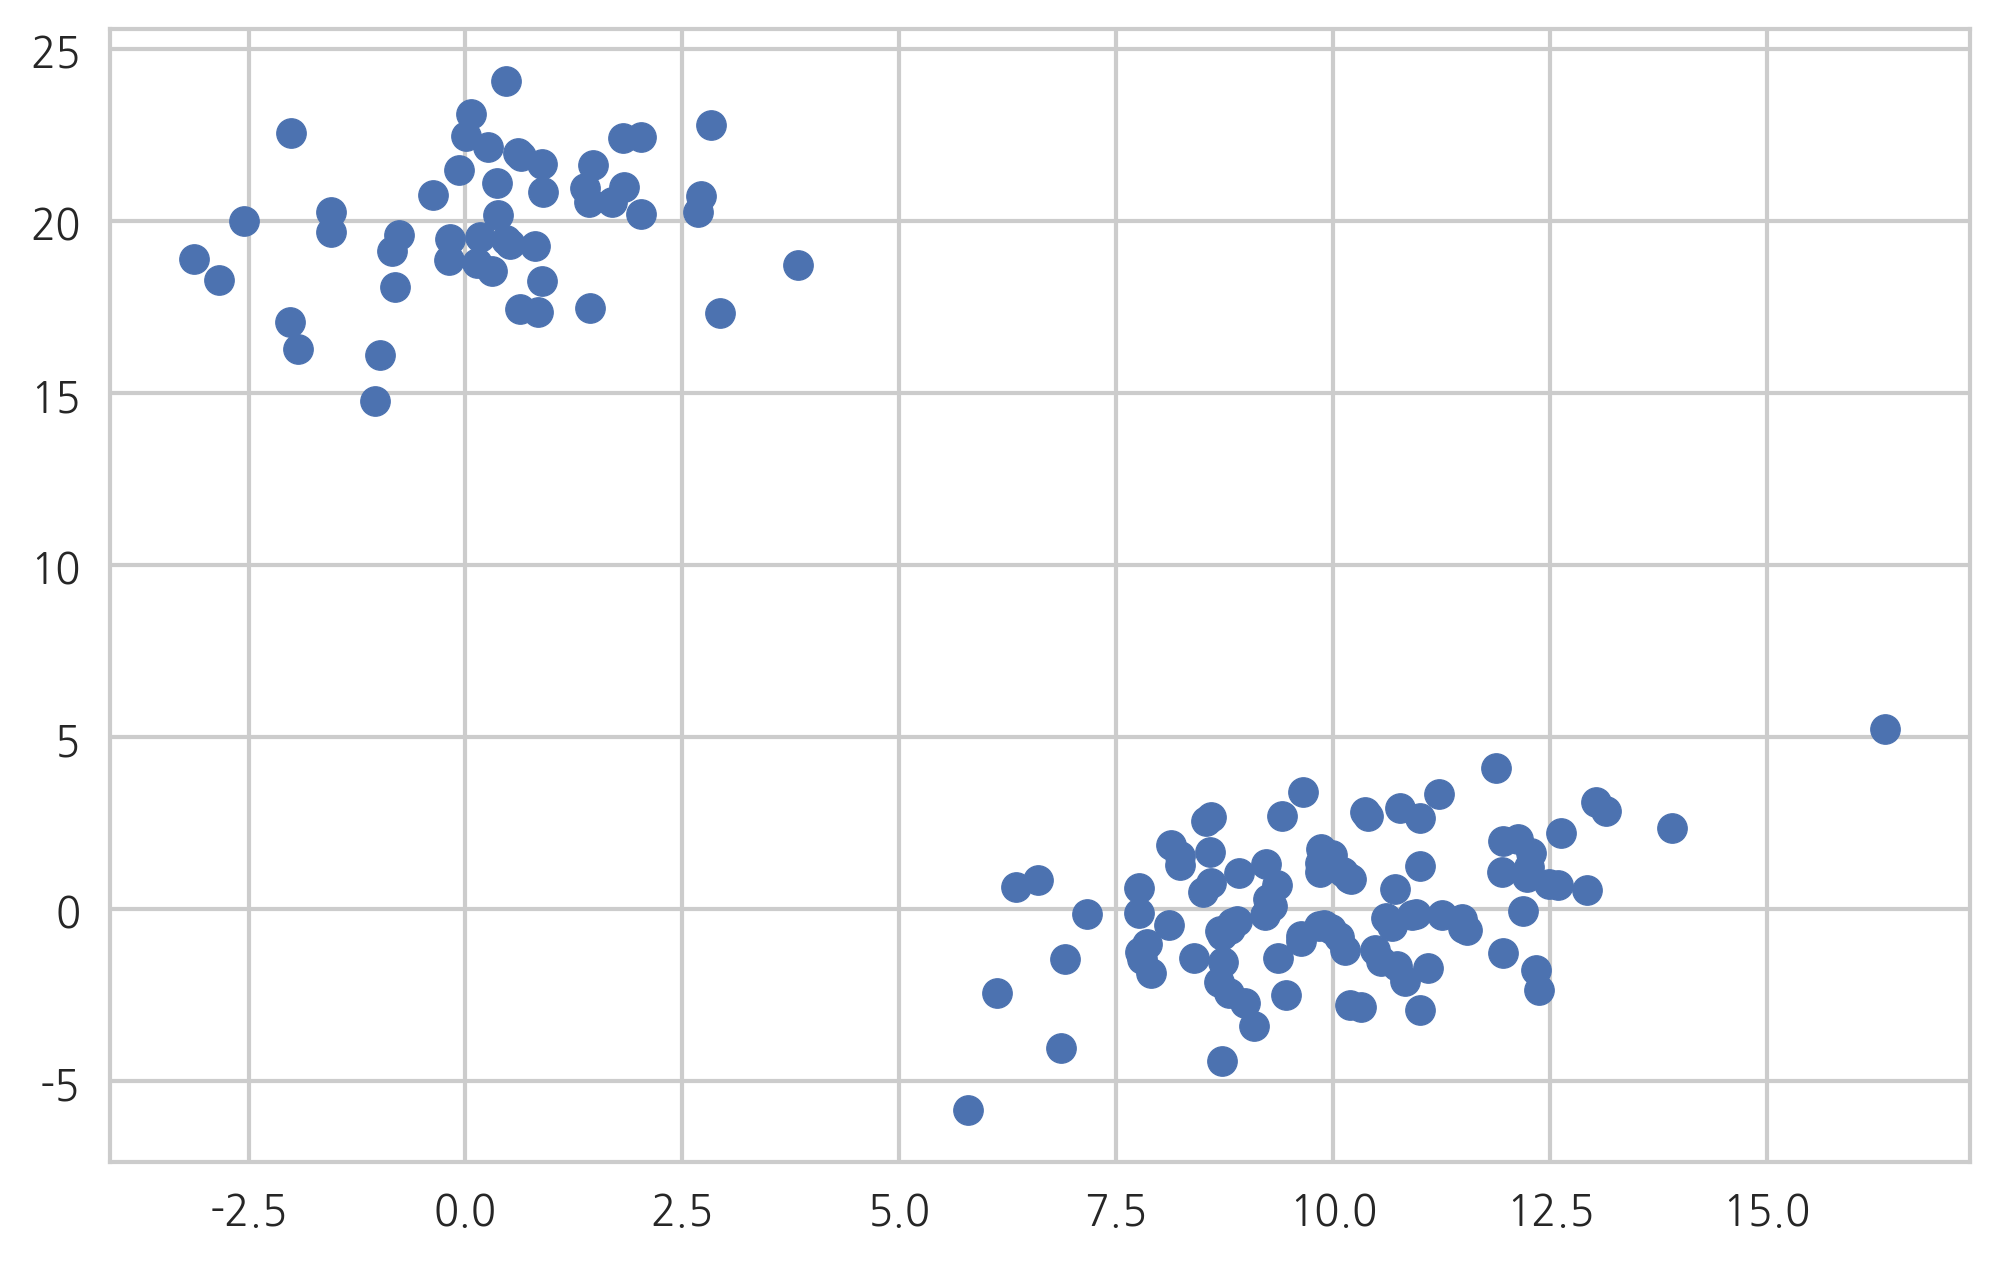

In [1]:
from scipy.cluster.hierarchy import linkage, dendrogram
np.set_printoptions(precision=5, suppress=True) 

np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
print(X.shape)

plt.scatter(X[:,0], X[:,1], s=50)
plt.show()

In [2]:
Z = linkage(X, 'ward')

In [3]:
Z[:20]

array([[  52.     ,   53.     ,    0.04151,    2.     ],
       [  14.     ,   79.     ,    0.05914,    2.     ],
       [  33.     ,   68.     ,    0.07107,    2.     ],
       [  17.     ,   73.     ,    0.07137,    2.     ],
       [   1.     ,    8.     ,    0.07543,    2.     ],
       [  85.     ,   95.     ,    0.10928,    2.     ],
       [ 108.     ,  131.     ,    0.11007,    2.     ],
       [   9.     ,   66.     ,    0.11302,    2.     ],
       [  15.     ,   69.     ,    0.11429,    2.     ],
       [  63.     ,   98.     ,    0.1212 ,    2.     ],
       [ 107.     ,  115.     ,    0.12167,    2.     ],
       [  65.     ,   74.     ,    0.1249 ,    2.     ],
       [  58.     ,   61.     ,    0.14028,    2.     ],
       [  62.     ,  152.     ,    0.1726 ,    3.     ],
       [  41.     ,  158.     ,    0.1779 ,    3.     ],
       [  10.     ,   83.     ,    0.18635,    2.     ],
       [ 114.     ,  139.     ,    0.20419,    2.     ],
       [  39.     ,   88.     ,

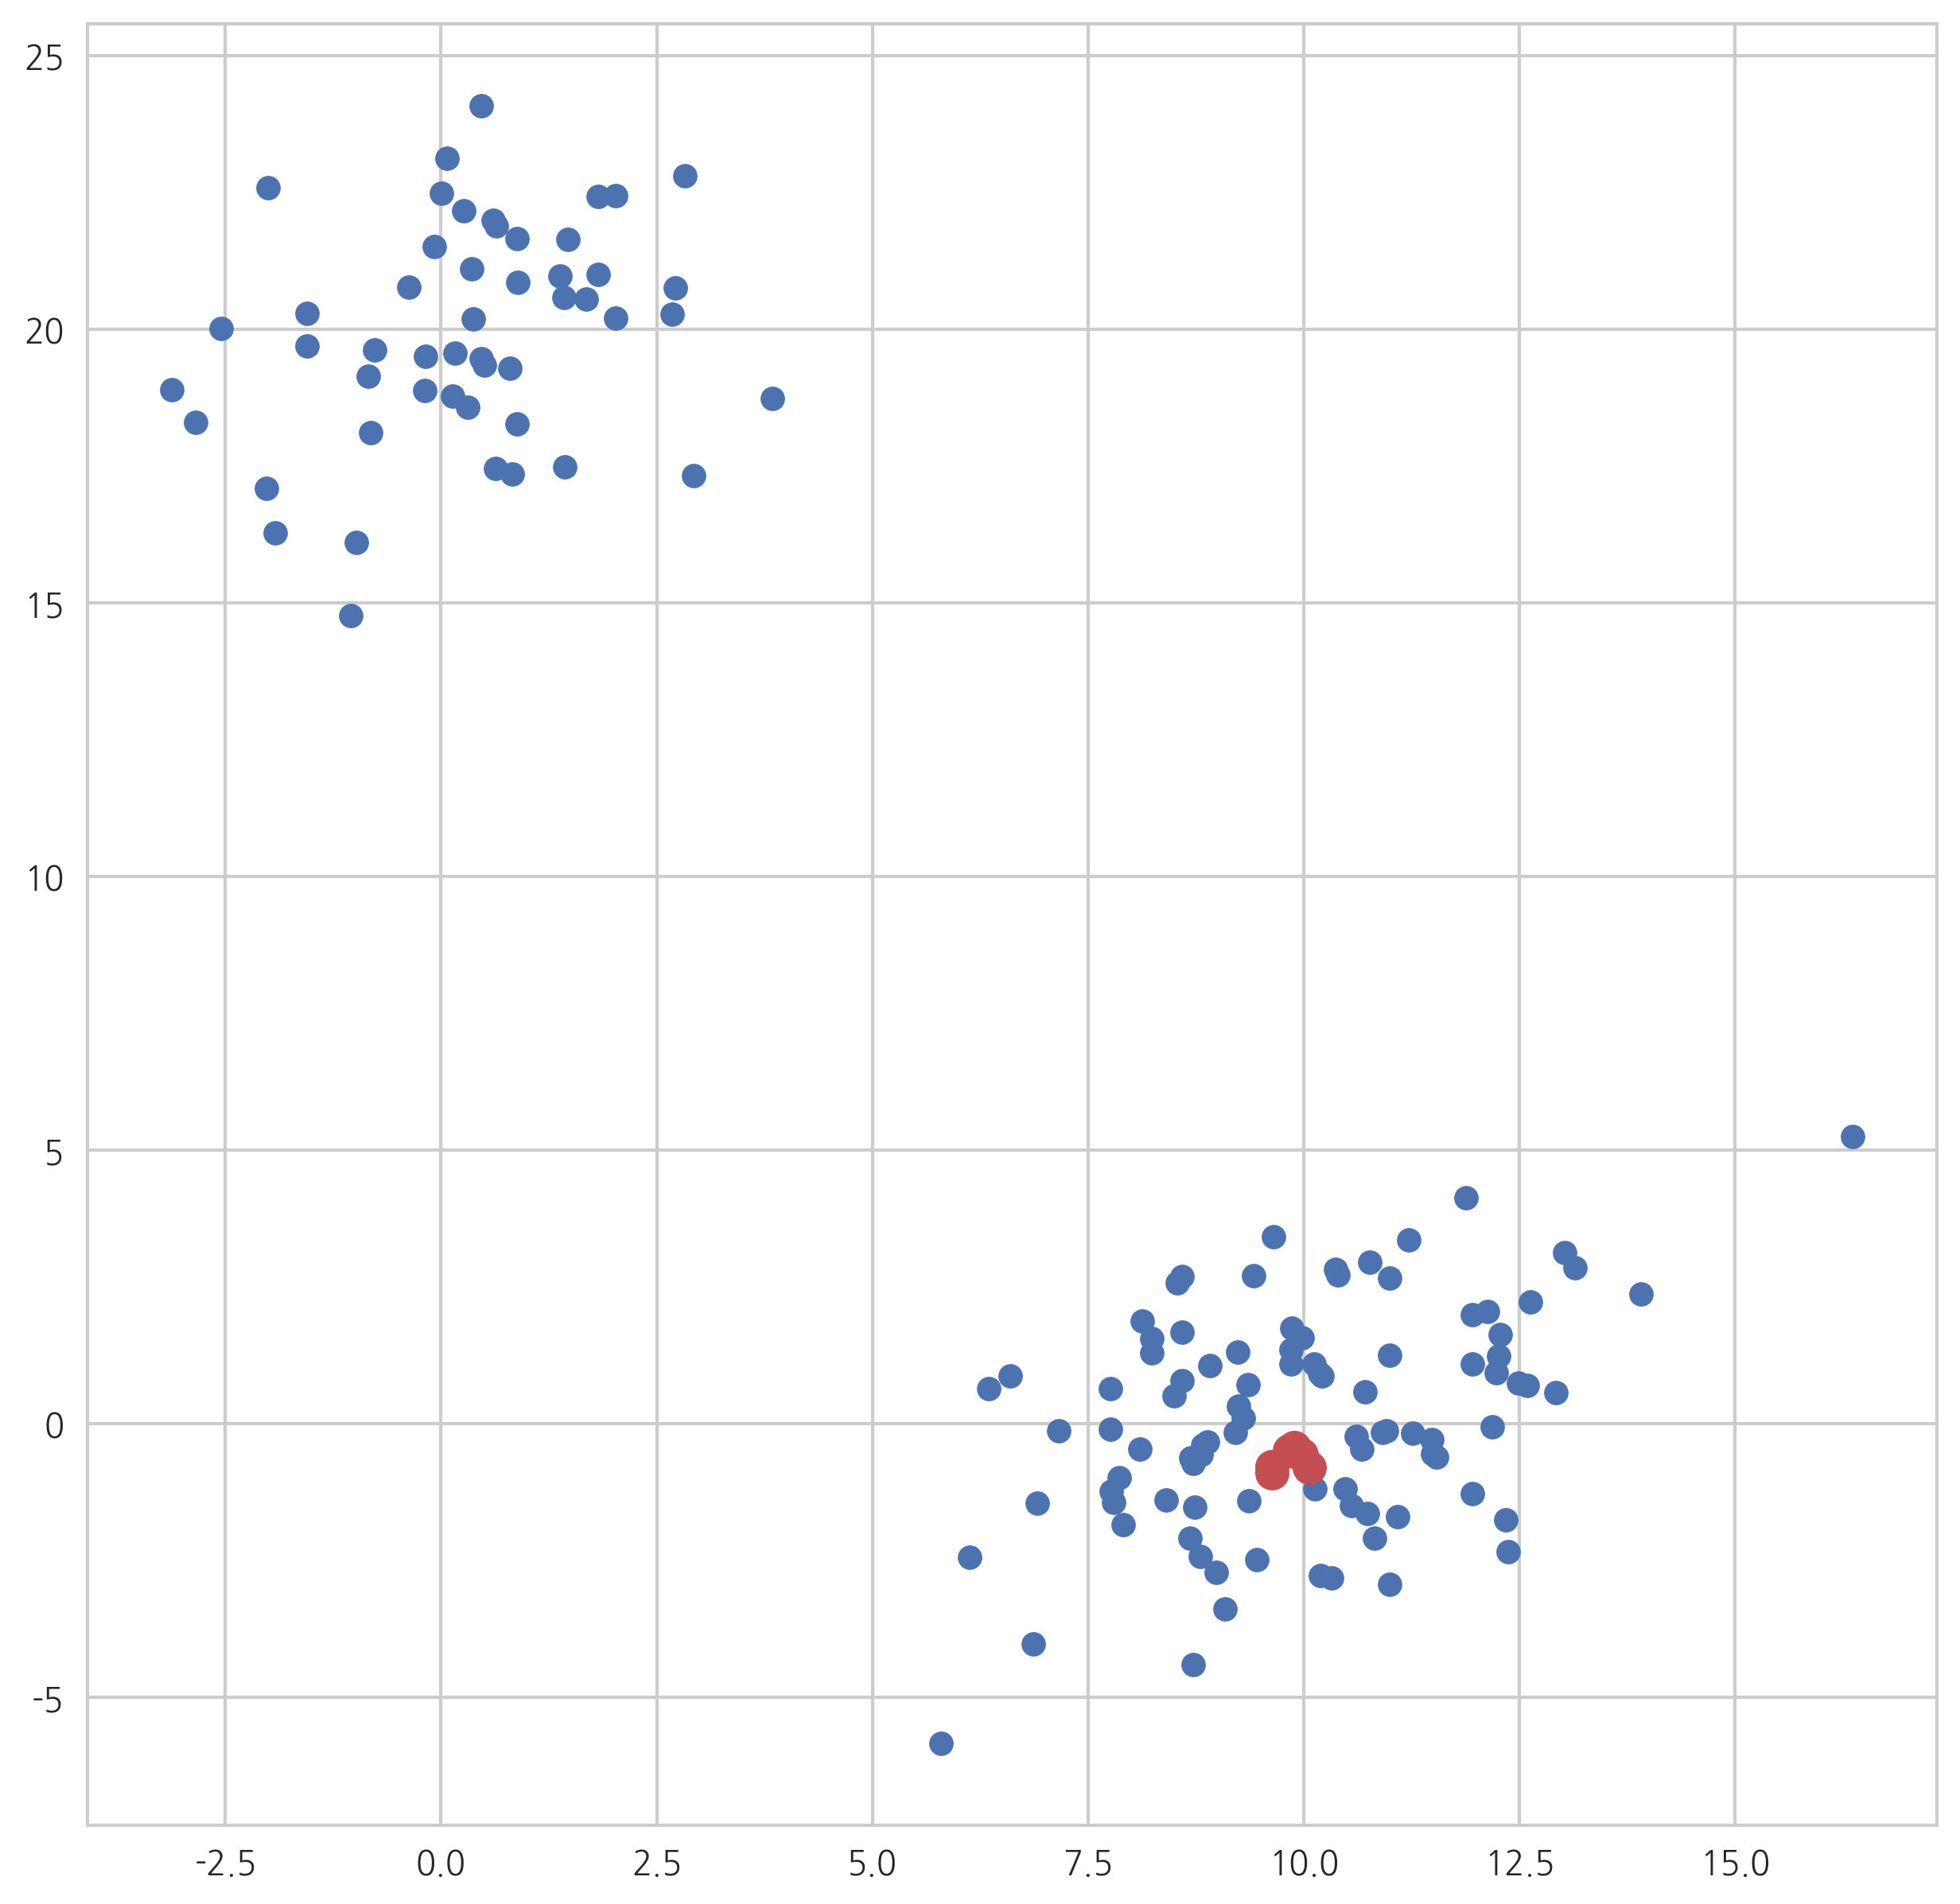

In [4]:
idxs = [33, 68, 62, 82, 63, 98]
plt.figure(figsize=(10, 10))
plt.scatter(X[:,0], X[:,1], s=50)
plt.scatter(X[idxs,0], X[idxs,1], c='r', s=100) 
plt.show()

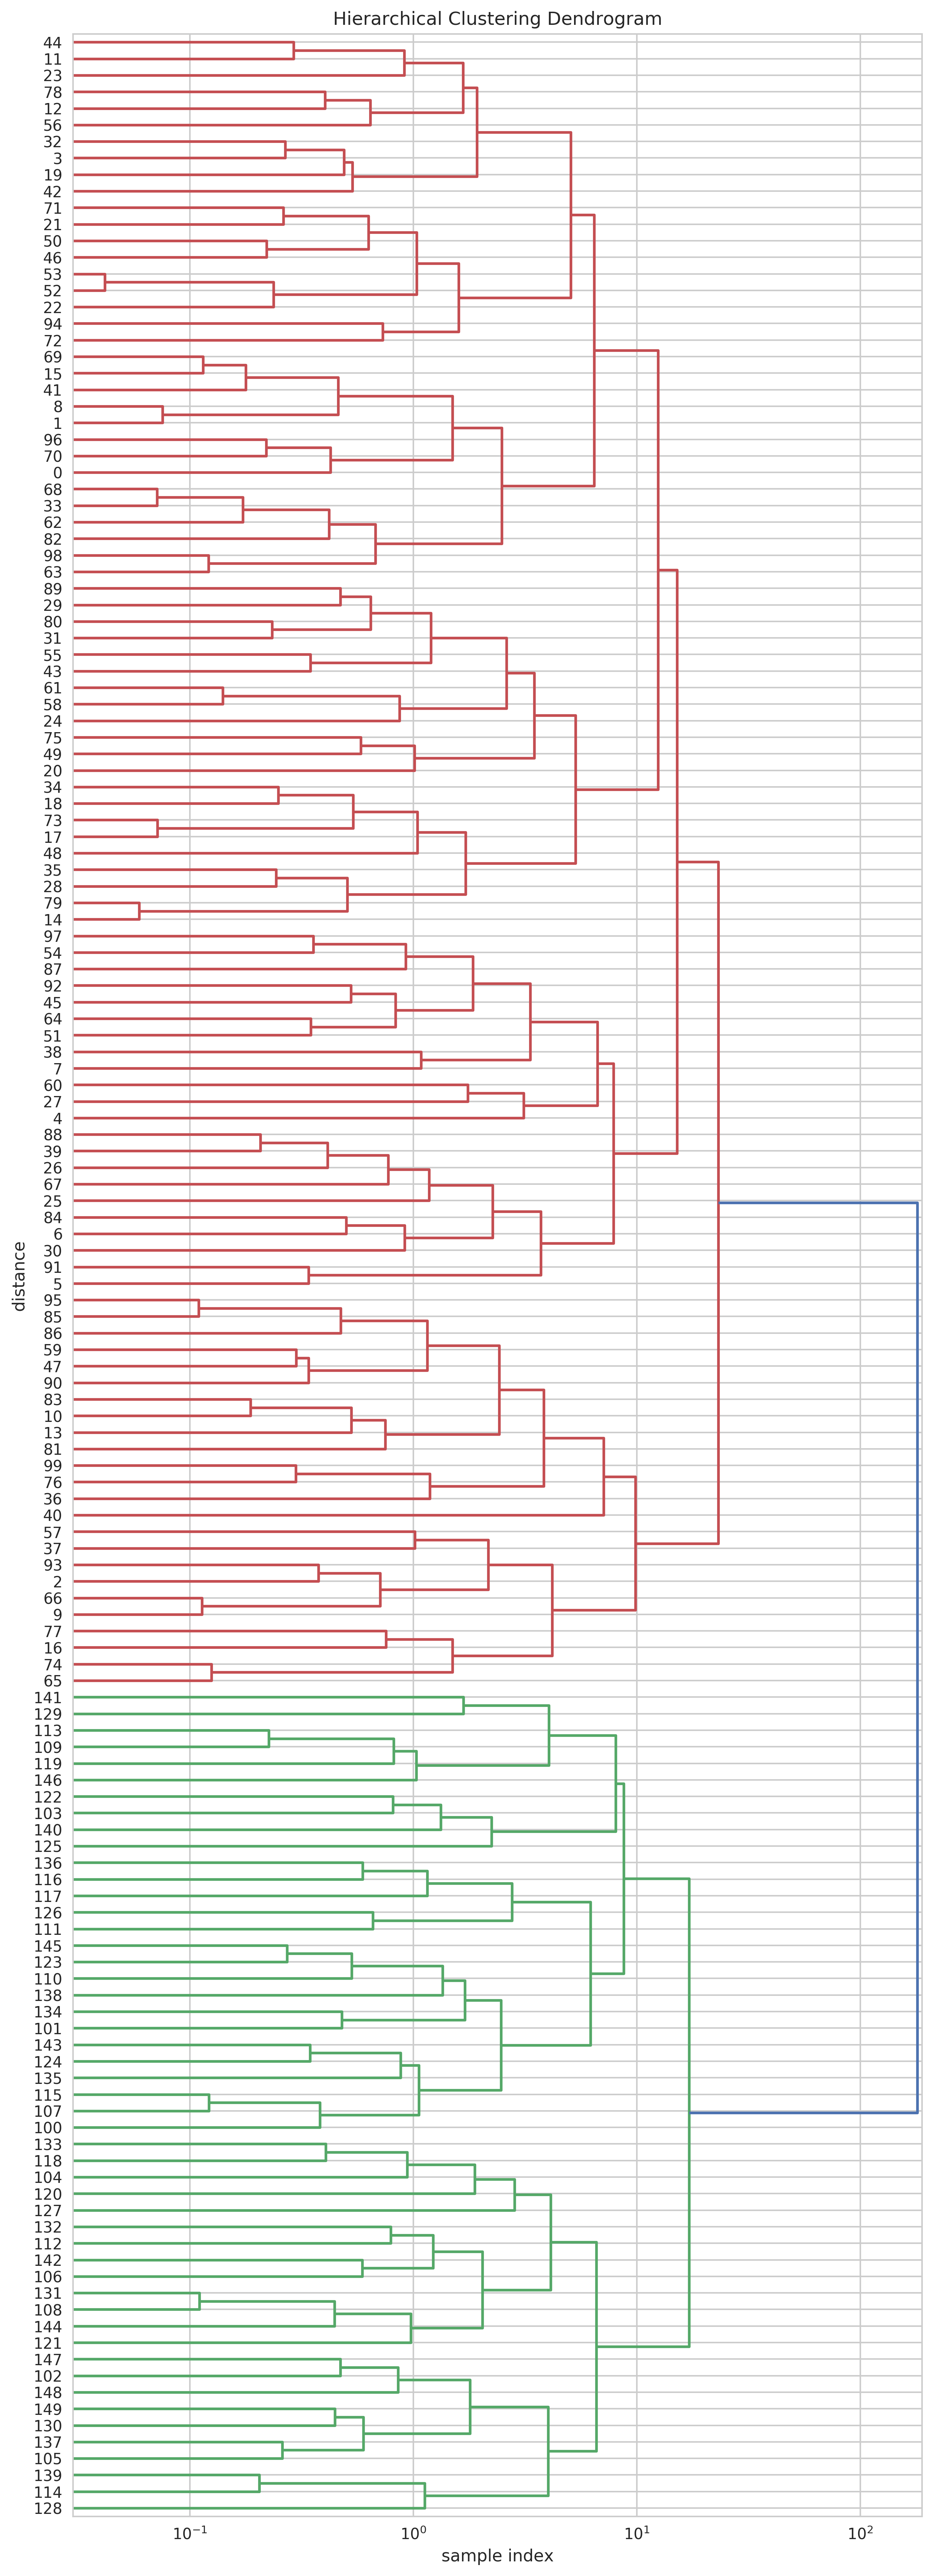

In [11]:
mpl.rcParams["font.family"] = 'DejaVu Sans'
plt.figure(figsize=(10,30))
ax = plt.subplot(111)
dendrogram(Z, leaf_font_size=10, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
ax.set_xlim(xmin=0.03)
ax.set_xscale('log')
plt.show()